In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [106]:
df = pd.read_csv("ipl.csv")

In [107]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


## Data Cleaning

In [108]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mid,76014.0,308.627740,178.156878,1.0,154.0,308.0,463.0,617.0
runs,76014.0,74.889349,48.823327,0.0,34.0,70.0,111.0,263.0
wickets,76014.0,2.415844,2.015207,0.0,1.0,2.0,4.0,10.0
overs,76014.0,9.783068,5.772587,0.0,4.6,9.6,14.6,19.6
runs_last_5,76014.0,33.216434,14.914174,0.0,24.0,34.0,43.0,113.0
wickets_last_5,76014.0,1.120307,1.053343,0.0,0.0,1.0,2.0,7.0
striker,76014.0,24.962283,20.079752,0.0,10.0,20.0,35.0,175.0
non-striker,76014.0,8.869287,10.795742,0.0,1.0,5.0,13.0,109.0
total,76014.0,160.901452,29.246231,67.0,142.0,162.0,181.0,263.0


In [110]:
df.venue.value_counts()

M Chinnaswamy Stadium                                   7443
Feroz Shah Kotla                                        7068
Eden Gardens                                            7049
Wankhede Stadium                                        7048
MA Chidambaram Stadium, Chepauk                         5972
Rajiv Gandhi International Stadium, Uppal               5827
Punjab Cricket Association Stadium, Mohali              4247
Sawai Mansingh Stadium                                  4110
Dr DY Patil Sports Academy                              2088
Subrata Roy Sahara Stadium                              2086
Maharashtra Cricket Association Stadium                 1843
Kingsmead                                               1731
Sardar Patel Stadium, Motera                            1484
Brabourne Stadium                                       1380
SuperSport Park                                         1377
Punjab Cricket Association IS Bindra Stadium, Mohali    1342
Saurashtra Cricket Assoc

In [111]:
drop_cols = ["mid","batsman","bowler","striker","non-striker"]
df.drop(labels=drop_cols,axis=1,inplace=True)

In [112]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [113]:
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [119]:
consistent_team = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils', 'Sunrisers Hyderabad',
       ]

In [120]:
df = df[(df.bat_team.isin(consistent_team)) & df.bowl_team.isin(consistent_team)]

In [121]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [122]:
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [123]:
df = df[df.overs >= 5.0]

In [124]:
df.bat_team.isin(df.bowl_team).unique()

array([ True])

In [125]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


####  Converting Date Time

In [126]:
from datetime import datetime
df["date"] = df.date.apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [127]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


# Data Preprocessing

In [136]:
encoding = pd.get_dummies(data=df,columns=["venue","bat_team","bowl_team"])
encoding.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,venue_Barabati Stadium,venue_Brabourne Stadium,venue_Buffalo Park,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [139]:
df_copy = df.copy()

In [140]:
df_copy.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


# Splitting The Data

Splitting should not be done randomly in time series data

In [141]:
encoding.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'venue_Barabati Stadium', 'venue_Brabourne Stadium',
       'venue_Buffalo Park', 'venue_De Beers Diamond Oval',
       'venue_Dr DY Patil Sports Academy',
       'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla',
       'venue_Himachal Pradesh Cricket Association Stadium',
       'venue_Holkar Cricket Stadium',
       'venue_JSCA International Stadium Complex', 'venue_Kingsmead',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Maharashtra Cricket Association Stadium',
       'venue_New Wanderers Stadium', 'venue_Newlands',
       'venue_OUTsurance Oval',
       'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal'

In [146]:

# Rearranging the columns
encoded_df = encoding[['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'venue_Barabati Stadium', 'venue_Brabourne Stadium',
       'venue_Buffalo Park', 'venue_De Beers Diamond Oval',
       'venue_Dr DY Patil Sports Academy',
       'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla',
       'venue_Himachal Pradesh Cricket Association Stadium',
       'venue_Holkar Cricket Stadium',
       'venue_JSCA International Stadium Complex', 'venue_Kingsmead',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Maharashtra Cricket Association Stadium',
       'venue_New Wanderers Stadium', 'venue_Newlands',
       'venue_OUTsurance Oval',
       'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sardar Patel Stadium, Motera', 'venue_Sawai Mansingh Stadium',
       'venue_Shaheed Veer Narayan Singh International Stadium',
       'venue_Sharjah Cricket Stadium', 'venue_Sheikh Zayed Stadium',
       "venue_St George's Park", 'venue_Subrata Roy Sahara Stadium',
       'venue_SuperSport Park', 'venue_Wankhede Stadium',
       'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','total']]

In [147]:
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

In [148]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

### Dropping Date Column

In [149]:

X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

#  Model Building

### Ridge Regression

In [150]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [151]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-7,1e-2,30,40,89,44,22,55,35,45,5,1,3]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-07, 0.01, 30, 40, 89, 44, 22, 55,
                                   35, 45, 5, 1, 3]},
             scoring='neg_mean_squared_error')

In [152]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 89}
-335.70815051079614


In [153]:
pred = ridge_regressor.predict(X_test)

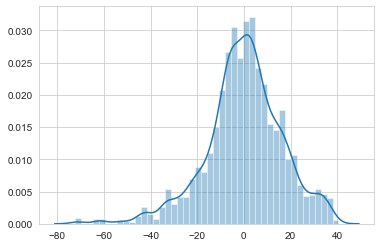

In [154]:
sns.distplot(y_test - pred)

In [155]:
from sklearn import metrics

In [156]:
print("MAE:",metrics.mean_absolute_error(y_test,pred))
print("MSE:",metrics.mean_squared_error(y_test,pred))
print("RMSE :",np.sqrt(metrics.mean_absolute_error(y_test,pred)))

MAE: 12.361401793614663
MSE: 272.2030440451973
RMSE : 3.51587852372841


## Lasso Regression

In [157]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [158]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-7,1e-2,30,40,89,44,22,55,35,45,5,1,3]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4121105.5420840736, tolerance: 2529.9556965945635
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4178116.7315025763, tolerance: 2547.0380710286604
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4340149.721990377, tolerance: 2667.8126904366527
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-07, 0.01, 30, 40, 89, 44, 22, 55,
                                   35, 45, 5, 1, 3]},
             scoring='neg_mean_squared_error')

In [159]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-320.8221491680912


In [160]:
prediction = lasso_regressor.predict(X_test)

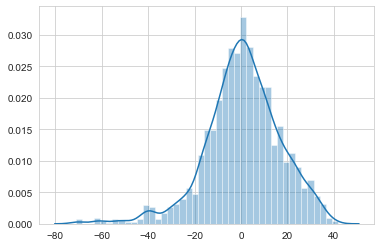

In [161]:
sns.distplot(y_test - prediction)

In [162]:
print("MAE:",metrics.mean_absolute_error(y_test,pred))
print("MSE:",metrics.mean_squared_error(y_test,pred))
print("RMSE :",np.sqrt(metrics.mean_absolute_error(y_test,pred)))

MAE: 12.361401793614663
MSE: 272.2030440451973
RMSE : 3.51587852372841
